In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset_path = '/content/drive/MyDrive/Colab Notebooks/Oasis Infobyte/Level 1/Project 1/retail_sales_dataset.csv'
data = pd.read_csv(dataset_path)

# Display basic dataset information
print("\nDataset Loaded Successfully!")
print("\nFirst 5 rows:")
print(data.head())
print("\nColumn Names:", data.columns.tolist())


Dataset Loaded Successfully!

First 5 rows:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  

Column Names: ['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit', 'Total Amount']


In [7]:
# Data Cleaning
print("\nChecking for missing values:")
missing_values = data.isnull().sum()
print(missing_values)

# Fill or drop missing values as needed
data.fillna(method='ffill', inplace=True)  # Forward fill as an example
print("\nMissing values after cleaning:")
print(data.isnull().sum())


Checking for missing values:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

Missing values after cleaning:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


<ipython-input-7-52fdae0e261f>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill as an example


In [8]:

# Descriptive Statistics
print("\nDescriptive Statistics:")
print(data.describe())


Descriptive Statistics:
       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


In [9]:
# Calculate mode (as it is not included in .describe())
mode_values = data.mode().iloc[0]
print("\nMode Values:")
print(mode_values)


Mode Values:
Transaction ID               1
Date                2023-05-16
Customer ID            CUST001
Gender                  Female
Age                       43.0
Product Category      Clothing
Quantity                   4.0
Price per Unit            50.0
Total Amount              50.0
Name: 0, dtype: object


In [10]:
# Time Series Analysis
print("\nConverting 'Date' column to datetime format:")
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


Converting 'Date' column to datetime format:


In [11]:
# Check for invalid dates
data = data.dropna(subset=['Date'])
print("\nUnique Dates Range:", data['Date'].min(), "to", data['Date'].max())

# Grouping sales data by Date
daily_sales = data.groupby('Date')['Total Amount'].sum()


Unique Dates Range: 2023-01-01 00:00:00 to 2024-01-01 00:00:00


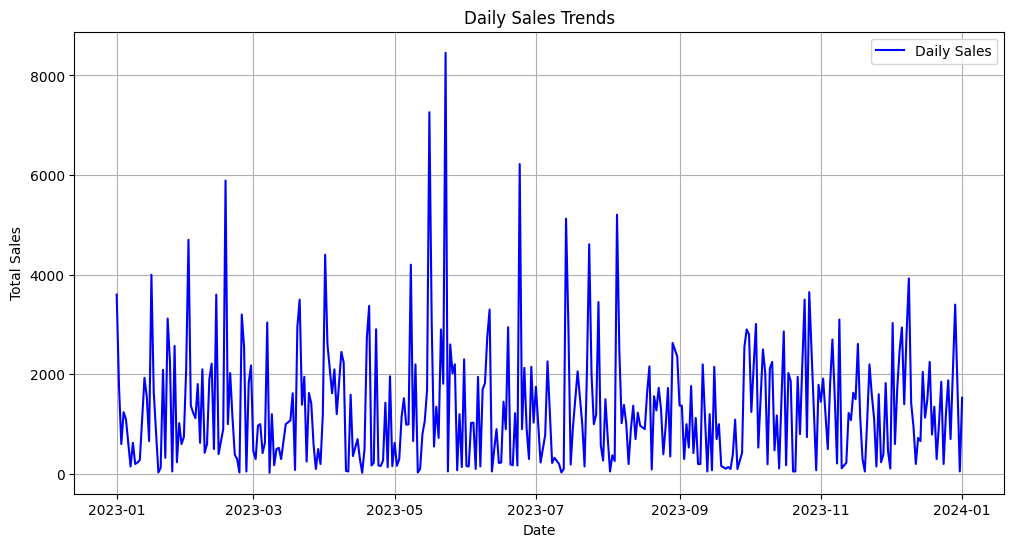

In [12]:

# Plot sales trends over time
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, label='Daily Sales', color='blue')
plt.title('Daily Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()

In [13]:

# Customer and Product Analysis
print("\nCustomer Demographics Analysis:")
customer_gender_dist = data['Gender'].value_counts()
customer_age_dist = data['Age'].describe()
print("\nGender Distribution:")
print(customer_gender_dist)
print("\nAge Distribution:")
print(customer_age_dist)


Customer Demographics Analysis:

Gender Distribution:
Gender
Female    510
Male      490
Name: count, dtype: int64

Age Distribution:
count    1000.00000
mean       41.39200
std        13.68143
min        18.00000
25%        29.00000
50%        42.00000
75%        53.00000
max        64.00000
Name: Age, dtype: float64


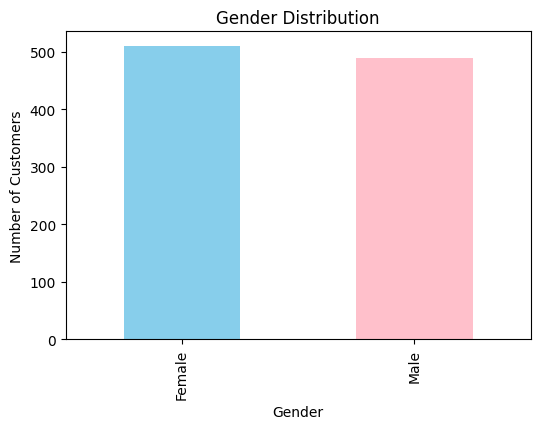

In [14]:
# Plot gender distribution
plt.figure(figsize=(6, 4))
customer_gender_dist.plot(kind='bar', color=['skyblue', 'pink'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

In [15]:

# Product Category Analysis
print("\nTop Product Categories:")
top_categories = data['Product Category'].value_counts().head(10)
print(top_categories)


Top Product Categories:
Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64


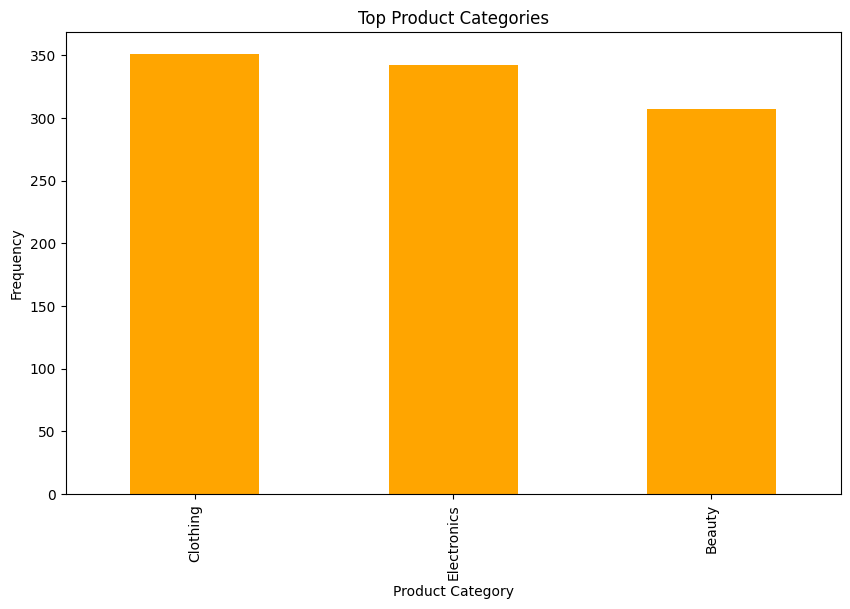

In [16]:
# Plot product category distribution
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='orange')
plt.title('Top Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.show()

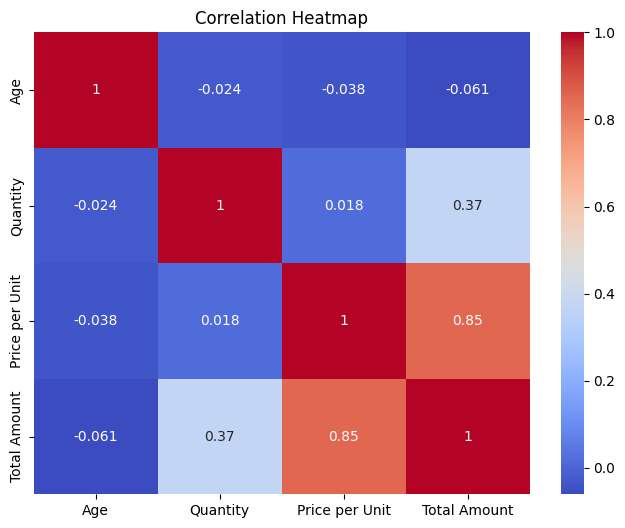

In [17]:
# Visualization
# Heatmap of correlation between numeric variables
plt.figure(figsize=(8, 6))
correlation_matrix = data[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

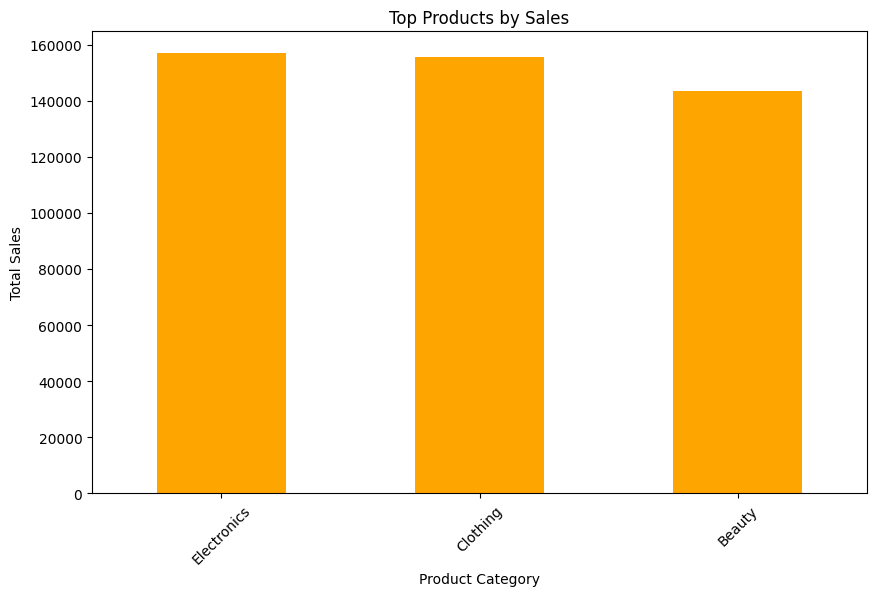

In [18]:
# Bar Charts: Product-wise sales comparison
product_sales = data.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
product_sales.plot(kind='bar', color='orange')
plt.title('Top Products by Sales')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()



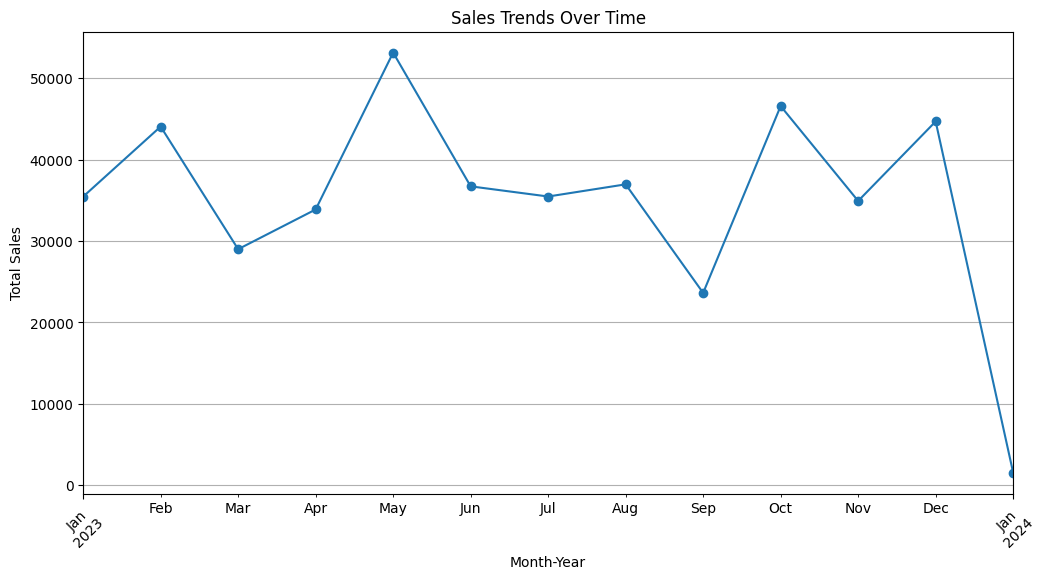

In [19]:
# Line Plot: Sales trends over months/years
data['YearMonth'] = data['Date'].dt.to_period('M')
monthly_sales = data.groupby('YearMonth')['Total Amount'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(marker='o', linestyle='-')
plt.title('Sales Trends Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [20]:
# Recommendations
print("\nRecommendations:")
print("1. Focus marketing efforts on the top-performing product categories.")
print("2. Develop targeted promotions for specific customer demographics (e.g., age and gender).")
print("3. Monitor daily sales trends to identify peak sales periods and optimize inventory.")
print("4. Leverage data on customer purchasing behavior to improve product offerings.")



Recommendations:
1. Focus marketing efforts on the top-performing product categories.
2. Develop targeted promotions for specific customer demographics (e.g., age and gender).
3. Monitor daily sales trends to identify peak sales periods and optimize inventory.
4. Leverage data on customer purchasing behavior to improve product offerings.
